I'm simply testing if using the automatic vectorization offered by keras changes something. Nothing changes.

In [2]:
import pandas as pd
import numpy as np

## DATASET

In [3]:
# Train
train = pd.read_csv('train_data.csv')
x_train = train['tweet']
y_train = train['class']

- Class $0$ -> hate speech
- Class $1$ -> offensive language
- Class $2$ -> neither

In [6]:
train.loc[:20, ['tweet', 'class']]

,tweet,class
0,Can't get no money from me you silly hoe,1
1,That was almost 10 years ago. I gave ALL them ...,1
2,"RT @RakwonOGOD: Bitches tweeting ""last night &...",1
3,"That hoe out there, Fat Trel said it best.",1
4,Can Charlie Crist pull one over on Rick Scott?...,2
5,RT @Realistt__: &#128525; &#8220;@Squirtology:...,1
6,My problem is caring about bitches &amp; noggas,1
7,All da white folk off twitter yet? Da colored ...,2
8,&#128514;&#128514;&#128514; played that nigga ...,1
9,RT @FlowDaddy24: @_RinkO0 @d_brad80 @0biwankob...,1


In [4]:
# Test
test = pd.read_csv('test_data.csv')
x_test = test['tweet']
y_test = test['class']

In [5]:
# Val
val = pd.read_csv('val_data.csv')
x_val = val['tweet']
y_val = val['class']

### PREPROCESSING
Removing tags, removing emojis and special words, removing non-alphanumeric characters 

In [6]:
import re
def f(s):
  return ''.join([(c if c.isalnum() else (' ' if c!='\'' else '')) for c in re.sub('((&|@).*?(;| ))', ' ', s.replace('\n', ' ').replace('\t', ' ').replace('RT', ' '))]).lower()

In [7]:
# Train
x_train_p = x_train.map(f)
x_train_p

0                  cant get no money from me you silly hoe
1        that was almost 10 years ago  i gave all them ...
2           bitches tweeting  last night     like they ...
3               that hoe out there  fat trel said it best 
4        can charlie crist pull one over on rick scott ...
                               ...                        
17343    going hard bitch swear im on my job throw a qu...
17344        parent in phoenix says administrators made...
17345       aw yall some hoes hating on that girl that ...
17346    watch out  ned   crc  worldcup2014  puravida h...
17347    jk  im going to be a pussy about it  i dont wa...
Name: tweet, Length: 17348, dtype: object

In [11]:
x_train

0                 Can't get no money from me you silly hoe
1        That was almost 10 years ago. I gave ALL them ...
2        RT @RakwonOGOD: Bitches tweeting "last night &...
3               That hoe out there, Fat Trel said it best.
4        Can Charlie Crist pull one over on Rick Scott?...
                               ...                        
17343    Going hard bitch swear I'm on my job throw a q...
17344    RT @AmPowerBlog: @velvethammer Parent in Phoen...
17345    RT @nostalgic_mike: Aw y'all some hoes hating ...
17346    Watch out #ned! #crc #worldcup2014 #puravida h...
17347    Jk. I'm going to be a pussy about it. I don't ...
Name: tweet, Length: 17348, dtype: object

In [8]:
# Test
x_test_p = x_test.map(f)

In [9]:
# Val
x_val_p = x_val.map(f)

### Keep only the $500$ most frequent words
The count of the frequences is done with respect to the training set

In [10]:
n_words_restr = 500

In [11]:
from collections import Counter

In [12]:
# Each training instance is a list of words
x_train_words = x_train_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_train_words

0        [cant, get, no, money, from, me, you, silly, hoe]
1        [that, was, almost, 10, years, ago, i, gave, a...
2        [bitches, tweeting, last, night, like, they, d...
3        [that, hoe, out, there, fat, trel, said, it, b...
4        [can, charlie, crist, pull, one, over, on, ric...
                               ...                        
17343    [going, hard, bitch, swear, im, on, my, job, t...
17344    [parent, in, phoenix, says, administrators, ma...
17345    [aw, yall, some, hoes, hating, on, that, girl,...
17346    [watch, out, ned, crc, worldcup2014, puravida,...
17347    [jk, im, going, to, be, a, pussy, about, it, i...
Name: tweet, Length: 17348, dtype: object

In [13]:
# Single list containing all the words, possibly repeated, in the train set.
# Basically, it is the train set squized into a single list.
train_list = []
for l in x_train_words:
  train_list += set(l)
print(train_list[:20])

['money', 'get', 'hoe', 'no', 'cant', 'me', 'silly', 'you', 'from', 'or', 'away', 'i', 'years', 'almost', 'all', 'stolen', 'them', 'were', 'that', '10']


In [14]:
# Set containing all the different possible words in the training set
words = set([])
for l in x_train_words:
  words.update(set(l))
print(words)

{'twist', 'times', 'dieselstation', 'unbothered', 'counted', 'turning', 'thatll', 'whitney', 'painted', 'ga', 'dude', 'investment', 'desert', 'induced', 'ballot', 'carry', 'financial', 'millionaire', 'wodeh', 'mientras', 'dislikes', 'calliou', 'sphere', 'wo', 'jqpzfti14w', 'rook', 'pineapple', 'dutchess', 'edits', 'smell', 'pink', 'german', 'ties', 'tribute', 'gargamel', 'hatred', 'beroyalkc', 'alyssa', 'asss', 'lmaoooooooo', 'officials', 'fa', 'espn', '63', '9931vyw9ff', 'dini', 'medusa', 'gooooo', 'newwww', 'clothing', 'uneducated', 'access', 'gotta', 'goldbar', 'speeches', 'triflin', 'srn5yc16', 'yadirasarmiento', 'fking', 'glitter', 'amediting', 'femininity', 'kix', 'horn', 'hos', 'wept', 'spatoon', 'consideration', 'krug', 'iwaited5yearsforfobandiallgotwasthisshittyarena', 'dolly', 'rey', 'stirring', 'f7ptmbsslu', 'uggs', 'enforcement', 'impossible', 'fl', 'pretending', 'burnating', 'shitty', 'e250', 'seryx9v', 'dignity', 'g00n', 'biiaaaatch', 'shiiii', 'cord', 'woah', 'bracken', 

In [15]:
# From set to list
words_list = list(words)

In [16]:
# List containing the count of each word in the training set
counter = Counter(train_list)
counts = [counter[w] for w in words_list]

In [17]:
# Restricting to only the first 500 most frequent words
words_list_restr = [words_list[i] for i in np.argsort(counts)[::-1][:n_words_restr]]
print(words_list_restr)

['bitch', 'a', 'i', 'the', 'you', 'to', 'and', 'that', 'my', 't', 'bitches', 'co', 'in', 'http', 'is', 'like', 'me', 'on', 'of', 'hoes', 'be', 'pussy', 'this', 'for', 'im', 'hoe', 'with', 'it', 'dont', 'all', 'but', 'up', 'ass', 'just', 'your', 'if', 'get', 'so', 'fuck', 'these', 'when', 'got', 'no', 'they', 'shit', 'not', 'nigga', 'aint', 'trash', 'out', 'are', 'lol', 'was', 'at', 'u', 'have', 'she', 'her', 'its', 'about', 'some', 'what', 'he', 'know', 'do', 'can', 'niggas', 'one', 'how', 'we', 'them', 'love', 'cant', 'fucking', 'go', 'who', 'or', 'thats', 'yall', 'from', 'now', 'want', 'yo', 'as', 'why', 'then', 'too', 'bad', 'youre', 'his', 'man', 'good', 'make', 'off', 'an', 'back', 'say', 'still', 'see', 'only', 'time', 'look', 'never', 'faggot', 'need', 'ya', 'think', 'hate', 'girl', 'will', 'people', 'really', 'being', 'even', 'right', 'real', 'white', 'bird', 'would', 'lmao', 'day', 'let', 'said', 'wanna', 'here', 'down', 'dick', 'by', 'little', 'had', 'more', 'their', 'over', 

In [18]:
# Set of all different possible words under consideration.
# We are updating the previously computed set, keeping only the 500 most frequent words
words = set(words_list_restr)

In [19]:
# Number of total possible different words
n_words= len(words)
n_words

500

In [20]:
# Each instance is a list of words
x_test_words = x_test_p.map(lambda s: [w for w in s.split(' ') if w!=''])
x_val_words = x_val_p.map(lambda s: [w for w in s.split(' ') if w!=''])

In [21]:
# Keeping only the 500 most frequent words.
# Each instance is a string.
x_train_p = x_train_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_test_p = x_test_words.map(lambda l: ' '.join([w for w in l if w in words]))
x_val_p = x_val_words.map(lambda l: ' '.join([w for w in l if w in words]))

In [22]:
x_train_p.shape

(17348,)

## VECTORIZATION
It is done with respect to the train set

In [23]:
from tensorflow.keras.layers import TextVectorization

In [24]:
vectorizer = TextVectorization(standardize='lower_and_strip_punctuation', split='whitespace')

In [25]:
vectorizer.adapt(x_train_p)

In [62]:
print(x_train_p.shape)
print(x_train_p[:5])

(17348,)
0                    cant get no money from me you hoe
1    that was 10 years i gave all them bitches away...
2    bitches last night like they did something be ...
3                  that hoe out there fat said it best
4    can charlie pull one over on well he did pull ...
Name: tweet, dtype: object


In [63]:
print(vectorizer(x_train_p).shape)
print(vectorizer(x_train_p)[:5])

(17348, 32)
tf.Tensor(
[[ 75  38  42 156  85  18   6  28   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9  52 419 480   4 498  33  70  12 361  79  41 218   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 12 220 240  17  41 205 233  22  21   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  9  28  56 140 194 122  27 229   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 68 157 474  71 134  20 206  62 205 474  71 134  20   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(5, 32), dtype=int64)


$32$ is the maximum number of words in a train sentence

In [26]:
# New set of all possible words
words = vectorizer.get_vocabulary()
words[:5]

['', '[UNK]', 'a', 'bitch', 'i']

In [27]:
# This new set of all possible words is the same as before, wxcept for two additional fake words (one fake word is for the padding)
n_words = len(words)
n_words

502

In [28]:
# Dictionary, which maps words into the corresponding integers (i.e. indeces) 
word2index = dict((c, i) for i, c in enumerate(words))

# Dictionary, which maps integers/indeces into the corresponding words 
index2word = dict((i, c) for i, c in enumerate(words))

Transform the dataset using the vectorizer

In [29]:
x_train_integers = vectorizer(x_train_p)

In [35]:
x_train_integers.shape

TensorShape([17348, 32])

In [33]:
# We have to define another vectorizer for the test and val, because we want them to have the same shape.
# In particular, we want them to have 32 as number of words in eache sentence
vectorizer_test_val = TextVectorization(vocabulary=words, output_sequence_length=32)

In [37]:
x_test_integers = vectorizer_test_val(x_test_p)
x_val_integers = vectorizer_test_val(x_val_p)

In [38]:
x_test_integers.shape

TensorShape([3717, 32])

In [63]:
# This is what we get if we do the vectorization with `vectorizer`: 29 is the output length
vectorizer(x_test_p).shape

TensorShape([3717, 29])

## BAG OF WORDS
It is done with respect to the train set

In [69]:
x_train.shape[0]

17348

In [41]:
# One-hot encoding the train set

x_train_oneHot = np.zeros((x_train.shape[0], n_words))

for i,v in enumerate(x_train_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_train_oneHot[i, w] = 1.0

x_train_oneHot.shape

(17348, 502)

In [42]:
# One-hot encoding the test set

x_test_oneHot = np.zeros((x_test.shape[0], n_words))

for i,v in enumerate(x_test_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_test_oneHot[i, w] = 1.0

x_test_oneHot.shape

(3717, 502)

In [43]:
# One-hot encoding the val set

x_val_oneHot = np.zeros((x_val.shape[0], n_words))

for i,v in enumerate(x_val_integers):
  for w in v:
    #print(w)
    if w==0:
      break
    x_val_oneHot[i, w] = 1.0

x_val_oneHot.shape

(3718, 502)

### MODEL
Simply Dense NN

In [44]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import Model

In [45]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)

x = Dense(units=64, activation='relu')(x)

x = Dense(units=64, activation='relu')(x)

res = Dense(units=3)(x)  # No activation

model = Model(xin, res)

In [46]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 502)]             0         
                                                                 
 dense (Dense)               (None, 64)                32192     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                                 
Total params: 40,707
Trainable params: 40,707
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [48]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [49]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=15, validation_data=[x_val_oneHot, y_val])

Epoch 1/15
136/136 [==============================] - 1s 5ms/step - loss: 0.5419 - accuracy: 0.8100 - val_loss: 0.3641 - val_accuracy: 0.8717
Epoch 2/15
136/136 [==============================] - 1s 4ms/step - loss: 0.3001 - accuracy: 0.8939 - val_loss: 0.3024 - val_accuracy: 0.8913
Epoch 3/15
136/136 [==============================] - 1s 4ms/step - loss: 0.2495 - accuracy: 0.9089 - val_loss: 0.3042 - val_accuracy: 0.8862
Epoch 4/15
136/136 [==============================] - 1s 4ms/step - loss: 0.2208 - accuracy: 0.9200 - val_loss: 0.3089 - val_accuracy: 0.8878
Epoch 5/15
136/136 [==============================] - 1s 4ms/step - loss: 0.1959 - accuracy: 0.9297 - val_loss: 0.3288 - val_accuracy: 0.8873
Epoch 6/15
136/136 [==============================] - 1s 4ms/step - loss: 0.1718 - accuracy: 0.9381 - val_loss: 0.3467 - val_accuracy: 0.8854
Epoch 7/15
136/136 [==============================] - 1s 4ms/step - loss: 0.1464 - accuracy: 0.9472 - val_loss: 0.3711 - val_accuracy: 0.8862
Epoch 

In [50]:
import matplotlib.pyplot as plt
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

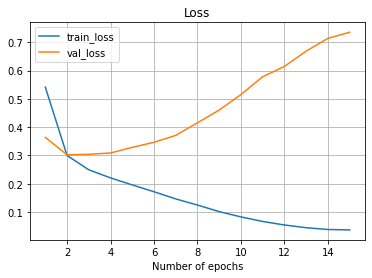

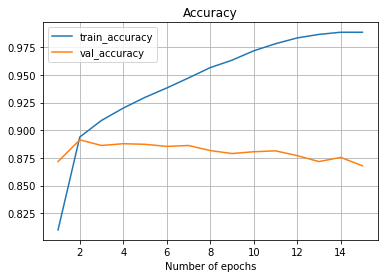

In [51]:
plot_history(hist)

In [52]:
from sklearn.metrics import classification_report 

y_test_pred = model.predict(x_test_oneHot)
print(y_test_pred.shape)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(y_test_pred.shape)

print(classification_report(y_test, y_test_pred))

(3717, 3)
(3717,)
              precision    recall  f1-score   support

           0       0.30      0.25      0.27       230
           1       0.90      0.93      0.92      2867
           2       0.81      0.75      0.78       620

    accuracy                           0.86      3717
   macro avg       0.67      0.64      0.66      3717
weighted avg       0.85      0.86      0.85      3717



## IMPROVING THE MODEL
Reducing overfitting

In [53]:
from keras import regularizers  # Import the regularizers

In [59]:
xin = Input(shape=(n_words,))

x = Dense(units=64, activation='relu')(xin)
x = Dropout(0.2)(x)

x = Dense(units=64, activation='relu')(x)
x = Dropout(0.2)(x)

res = Dense(units=3)(x)

model = Model(xin, res)

In [60]:
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 502)]             0         
                                                                 
 dense_4 (Dense)             (None, 64)                32192     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 36,547
Trainable params: 36,547
Non-trainable

Epoch 1/10
136/136 [==============================] - 1s 5ms/step - loss: 0.5933 - accuracy: 0.7725 - val_loss: 0.3734 - val_accuracy: 0.8674
Epoch 2/10
136/136 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8783 - val_loss: 0.3008 - val_accuracy: 0.8897
Epoch 3/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2811 - accuracy: 0.8997 - val_loss: 0.2964 - val_accuracy: 0.8897
Epoch 4/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2565 - accuracy: 0.9078 - val_loss: 0.2939 - val_accuracy: 0.8886
Epoch 5/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2384 - accuracy: 0.9156 - val_loss: 0.2984 - val_accuracy: 0.8865
Epoch 6/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2254 - accuracy: 0.9206 - val_loss: 0.3002 - val_accuracy: 0.8870
Epoch 7/10
136/136 [==============================] - 1s 4ms/step - loss: 0.2125 - accuracy: 0.9260 - val_loss: 0.3040 - val_accuracy: 0.8881
Epoch 

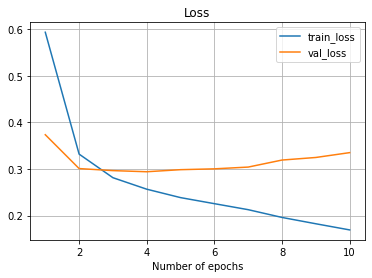

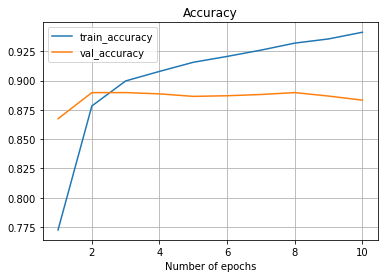

In [61]:
hist = model.fit(x_train_oneHot, y_train, batch_size=128, epochs=10, validation_data=[x_val_oneHot, y_val])#, callbacks=[early_stop_callback])
plot_history(hist)

y_test_pred = model.predict(x_test_oneHot)
y_test_pred = np.argmax(y_test_pred, axis=-1)
print(classification_report(y_test, y_test_pred))

We get exactly the same best score of $0.71$.